<a href="https://colab.research.google.com/github/Sundragon1993/CS231n_2020/blob/main/Modern_ConvNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Code for plotting the keras model graph
Uncomment -> run -> comment out -> restart runtime

In [41]:
# %%capture
# !pip install pydot
# !apt-get install graphviz
# !sed -i 's/def _check_pydot()/def _check__pydot()/g' /usr/local/lib/python3.6/dist-packages/keras/utils/vis_utils.py
# !sed -i 's/_check_pydot()/#_check_pydot()/g' /usr/local/lib/python3.6/dist-packages/keras/utils/vis_utils.py

### [Cheatsheet](https://drive.google.com/open?id=1iWhJiMT9pgWqYA_3-iRyvQ1DwlhV3hGdR-pinZiiHfk)

### **Disclaimer**:

These functions were developed for educational purposes.

The main idea is to keep the code as simple and clean as possible for someone to get the structure of each model easily.

For more configurable implementations of these models please refer to other available github repositories.

## Imports

In [42]:
%%capture
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np

## AlexNet

In [43]:
def alexnet(input_shape, n_classes):
  input = Input(input_shape)
  
  # actually batch normalization didn't exist back then
  # they used LRN (Local Response Normalization) for regularization
  x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Conv2D(256, 5, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
  x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Flatten()(x)
  x = Dense(4096, activation='relu')(x)
  x = Dense(4096, activation='relu')(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

## VGG

In [44]:
def vgg(input_shape, n_classes):
  
  input = Input(input_shape)
  
  x = Conv2D(64, 3, padding='same', activation='relu')(input)
  x = Conv2D(64, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Conv2D(128, 3, padding='same', activation='relu')(x)
  x = Conv2D(128, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Flatten()(x)
  x = Dense(4096, activation='relu')(x)
  x = Dense(4096, activation='relu')(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

## Inception

In [45]:
def googlenet(input_shape, n_classes):
  
  def inception_block(x, f):
    t1 = Conv2D(f[0], 1, activation='relu')(x)
    
    t2 = Conv2D(f[1], 1, activation='relu')(x)
    t2 = Conv2D(f[2], 3, padding='same', activation='relu')(t2)
    
    t3 = Conv2D(f[3], 1, activation='relu')(x)
    t3 = Conv2D(f[4], 5, padding='same', activation='relu')(t3)
    
    t4 = MaxPool2D(3, 1, padding='same')(x)
    t4 = Conv2D(f[5], 1, activation='relu')(t4)
    
    output = Concatenate()([t1, t2, t3, t4])
    return output
  
  
  input = Input(input_shape)
  
  x = Conv2D(64, 7, strides=2, padding='same', activation='relu')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  x = Conv2D(64, 1, activation='relu')(x)
  x = Conv2D(192, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = inception_block(x, [64, 96, 128, 16, 32, 32])
  x = inception_block(x, [128, 128, 192, 32, 96, 64])
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  x = inception_block(x, [192, 96, 208, 16, 48, 64])
  x = inception_block(x, [160, 112, 224, 24, 64, 64])
  x = inception_block(x, [128, 128, 256, 24, 64, 64])
  x = inception_block(x, [112, 144, 288, 32, 64, 64])
  x = inception_block(x, [256, 160, 320, 32, 128, 128])
  x = MaxPool2D(3, strides=2, padding='same')(x)

  x = inception_block(x, [256, 160, 320, 32, 128, 128])
  x = inception_block(x, [384, 192, 384, 48, 128, 128])
  
  x = AvgPool2D(7, strides=1)(x)
  x = Dropout(0.4)(x)
  
  x = Flatten()(x)
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [46]:
def googleinception(input_shape,n_classes):
  def inception_block(x,f): #the number of filters(channel) f will be change
    t1 = Conv2D(f[0],1,activation='relu')(x) #filters,kernel_size,strides,padding
    t2 = Conv2D(f[1],1,activation='relu')(x)
    t2 = Conv2D(f[2],3,padding='same',activation='relu')(t2)
    t3 = Conv2D(f[3],1,activation='relu')(x)
    t3 = Conv2D(f[4],5,padding='same',activation='relu')(t3)
    t4 = MaxPool2D(3,strides=1,padding='same')(x) #poolsize,strides,padding
    t4 = Conv2D(f[5],1,activation='relu')(t4)

    output = Concatenate()([t1,t2,t3,t4])
    return output

  input = Input(input_shape)
  x = Conv2D(64,7,strides=2,padding='same',activation='relu')(input)
  x = MaxPool2D(3,strides=2,padding='same')(x)

  x = Conv2D(64,1,activation='relu')(x)
  x = Conv2D(192,3,strides=1,padding= 'same',activation='relu')(x)
  x = MaxPool2D(3,strides=2)(x)

  x = inception_block(x,[64,96,128,16,32,32])
  x = inception_block(x,[128,128,192,32,96,64])
  x = MaxPool2D(3,strides=2)(x)

  x = inception_block(x,[192,96,208,16,48,64])
  x = inception_block(x,[160,112,224,24,64,64])
  x = inception_block(x,[128,128,256,24,64,64])
  x = inception_block(x,[112,144,288,32,64,64])
  x = inception_block(x,[256,160,320,32,128,128])

  x = MaxPool2D(3,strides=2,padding='same')(x)
  x = inception_block(x,[256,160,320,32,128,128])
  x = inception_block(x,[384,192,384,48,128,128])
  x = AvgPool2D(7,strides=1,padding='same')(x)

  x = Dropout(0.4)(x)
  x = Flatten()(x)
  output = Dense(n_classes,activation='softmax')(x)

  model = Model(input, output)

  return model


## MobileNet

In [47]:
def mobilenet(input_shape, n_classes):
  
  def mobilenet_block(x, f, s=1):
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(f, 1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
    
    
  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)
  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, 2)
  x = mobilenet_block(x, 1024)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [48]:
def mobilenet_my(input_shape,n_classes):
  def mobilenet_block(x,f,s=1):
    x = DepthwiseConv2D(3,strides=s,padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(f,1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
  
  input = Input(input_shape)
  x = Conv2D(32,3,strides = 2,padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = mobilenet_block(x,64)
  x = mobilenet_block(x,128,s=2)
  x = mobilenet_block(x,128,s=1)
  x = mobilenet_block(x,256,s=2)
  x = mobilenet_block(x,256,s=1)
  x = mobilenet_block(x,512,s=2)
  for i in range(5):
    x = mobilenet_block(x,512,s=1)
  
  x = mobilenet_block(x,1024,s=2)
  x = mobilenet_block(x,1024,s=2)
  x = GlobalAvgPool2D()(x)
  output = Dense(n_classes,activation='softmax')(x)
  model = Model(input,output)
  return model

## ShuffleNet

In [49]:
def shufflenet(input_shape, n_classes, g=8):
  channels = 384, 769, 1536
  repetitions = 3, 7, 3
  
  def ch_shuffle(x, g):
#     1 2 3 4 5 6 7 8 9 -reshape-> 1 2 3 -permute dims-> 1 4 7 -reshape-> 1 4 7 2 5 8 3 6 9
#                                  4 5 6                 2 5 8
#                                  7 8 9                 3 6 9
    
    _, w, h, ch = K.int_shape(x)
    ch_g = ch // g
    
    def shuffle_op(x):
      x = K.reshape(x, [-1, w, h, ch_g, g])
      x = K.permute_dimensions(x, [0, 1, 2, 4, 3])
      x = K.reshape(x, [-1, w, h, ch])
      return x
    
    x = Lambda(shuffle_op)(x)
    return x
    
  
  def gconv(tensor, ch, g):
    _, _, _, in_ch = K.int_shape(tensor)
    ch_g = in_ch // g
    out_ch = ch // g
    group = []
    
    for i in range(g):
#       x = tensor[:, :, :, i*ch_g:(i+1)*ch_g]
      x = Lambda(lambda x: x[:, :, :, i*ch_g: (i+1)*ch_g])(tensor)
      x = Conv2D(out_ch, 1)(x)
      group.append(x)
    
    x = Concatenate()(group)
    return x
  
  
  def shufflenet_block(tensor, ch, s, g):
    x = gconv(tensor, ch // 4, g)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = ch_shuffle(x, g)
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = gconv(x, ch if s==1 else ch-K.int_shape(tensor)[-1], g)
    x = BatchNormalization()(x)
    
    if s == 1:
      x = Add()([tensor, x])
    else:
      avg = AvgPool2D(3, strides=2, padding='same')(tensor)
      x = Concatenate()([avg, x])
    
    output = ReLU()(x)
    return output
  
  
  def stage(x, ch, r, g): #r: repetition
    x = shufflenet_block(x, ch, 2, g)
    
    for i in range(r):
      x = shufflenet_block(x, ch, 1, g)
      
    return x
  
  input = Input(input_shape)
  
  x = Conv2D(24, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  for ch, r in zip(channels, repetitions):
    x = stage(x, ch, r, g)
    
  x = GlobalAvgPool2D()(x)
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

## ResNet

In [50]:
def resnet(input_shape, n_classes):
  
  def conv_bn_rl(x, f, k=1, s=1, p='same'):
    x = Conv2D(f, k, strides=s, padding=p)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
  
  
  def identity_block(tensor, f):
    x = conv_bn_rl(tensor, f)
    x = conv_bn_rl(x, f, 3)
    x = Conv2D(4*f, 1)(x)
    x = BatchNormalization()(x)
    
    x = Add()([x, tensor])
    output = ReLU()(x)
    return output
  
  
  def conv_block(tensor, f, s):
    x = conv_bn_rl(tensor, f)
    x = conv_bn_rl(x, f, 3, s)
    x = Conv2D(4*f, 1)(x)
    x = BatchNormalization()(x)
    
    shortcut = Conv2D(4*f, 1, strides=s)(tensor)
    shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    output = ReLU()(x)
    return output
  
  
  def resnet_block(x, f, r, s=2):
    x = conv_block(x, f, s)
    for _ in range(r-1):
      x = identity_block(x, f)
    return x
    
  
  input = Input(input_shape)
  
  x = conv_bn_rl(input, 64, 7, 2)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  x = resnet_block(x, 64, 3, 1)
  x = resnet_block(x, 128, 4)
  x = resnet_block(x, 256, 6)
  x = resnet_block(x, 512, 3)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

## DenseNet

In [51]:
def densenet(img_shape, n_classes, f=32):
  repetitions = 6, 12, 24, 16
  
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 4*f)
      x = bn_rl_conv(x, f, 3)
      tensor = Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = Input(img_shape)
  
  x = Conv2D(64, 7, strides=2, padding='same')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  x = GlobalAvgPool2D()(d)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [52]:
def my_densenet(input_shape,n_classes,f=32):
  repetition = [6,12,24,16]
  def bn_rl_conv(x,f,k=1,s=1,p='same'): # input tensor, #filters, kernel size, strides
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(f,k,strides=s,padding=p)(x)
    return x
  
  def dense_block(tensor,r):
    for _ in range(r):
      x = bn_rl_conv(tensor,4*f)
      x = bn_rl_conv(x,f,3)
      tensor = Concatenate()([tensor,x])
    
    return tensor
  
  def transition_layer(x):
    x = bn_rl_conv(x,K.int_shape(x)[-1]//2)
    x = AvgPool2D(2,strides=2,padding='same')(x)
    return x

  input = Input(input_shape)
  x = Conv2D(64,7,strides=2,padding='same')(input)# don't use batchnormalization after input image
  x = MaxPool2D(3,strides=2,padding='same')(x)

  for rr in repetition:
    print(rr)
    d = dense_block(x,rr)
    x = transition_layer(d)

  x = GlobalAvgPool2D()(d)
  output = Dense(n_classes, activation='softmax')(x)
  model = Model(input,output)
  return model

## Xception

In [53]:
def xception(input_shape, n_classes):
  
  def conv_bn(x, f, k, s=1, p='same'):
    x = Conv2D(f, k, strides=s, padding=p, use_bias=False)(x)
    x = BatchNormalization()(x)
    return x
  
  
  def sep_bn(x, f, k, s=1, p='same'):
    x = SeparableConv2D(f, k, strides=s, padding=p, use_bias=False)(x)
    x = BatchNormalization()(x)
    return x
  
  
  def entry_flow(x):
    x = conv_bn(x, 32, 3, 2)
    x = ReLU()(x)
    x = conv_bn(x, 64, 3)
    tensor = ReLU()(x)
    
    x = sep_bn(tensor, 128, 3)
    x = ReLU()(x)
    x = sep_bn(x, 128, 3)
    x = MaxPool2D(3, strides=2, padding='same')(x)
    
    tensor = conv_bn(tensor, 128, 1, 2)
    
    x = Add()([tensor, x])
    x = ReLU()(x)
    x = sep_bn(x, 256, 3)
    x = ReLU()(x)
    x = sep_bn(x, 256, 3)
    x = MaxPool2D(3, strides=2, padding='same')(x)
    
    tensor = conv_bn(tensor, 256, 1, 2)
    
    x = Add()([tensor, x])
    x = ReLU()(x)
    x = sep_bn(x, 728, 3)
    x = ReLU()(x)
    x = sep_bn(x, 728, 3)
    x = MaxPool2D(3, strides=2, padding='same')(x)
    
    tensor = conv_bn(tensor, 728, 1, 2)
    x = Add()([tensor, x])
    
    return x
  
  
  def middle_flow(tensor):
    for _ in range(8):
      x = ReLU()(tensor)
      x = sep_bn(x, 728, 3)
      x = ReLU()(x)
      x = sep_bn(x, 728, 3)
      x = ReLU()(x)
      x = sep_bn(x, 728, 3)

      tensor = Add()([tensor, x])
    
    return tensor
  
  
  def exit_flow(tensor):
    x = ReLU()(tensor)
    x = sep_bn(x, 728, 3)
    x = ReLU()(x)
    x = sep_bn(x, 1024, 3)
    x = MaxPool2D(3, strides=2, padding='same')(x)
    
    tensor = conv_bn(tensor, 1024, 1, 2)
    
    x = Add()([tensor, x])
    x = sep_bn(x, 1536, 3)
    x = ReLU()(x)
    x = sep_bn(x, 2048, 3)
    x = ReLU()(x)
    x = GlobalAvgPool2D()(x)
    x = Dense(n_classes, activation='softmax')(x)
  
    return x
  
  
  input = Input(input_shape)
  
  x = entry_flow(input)
  x = middle_flow(x)
  output = exit_flow(x)
  
  model = Model(input, output)
  
  return model

In [73]:
def my_Xception(input_shape,n_classes):
  '''Separable convolutions consist of 
  first performing a depthwise spatial convolution (which acts on each input channel separately) 
  followed by a pointwise convolution which mixes the resulting output channels
  3x3x1x3 + 1x1x3x64 = 219
  intead of 3x3x3x64 = 1728
  '''
  def conv_bn(x,filters,kernel_size, strides=1):
    x = Conv2D(filters=filters,kernel_size= kernel_size,strides=strides,padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    return x
  
  def separable_bn(x,filters,kernel_size, strides=1):
    x = SeparableConv2D(filters=filters,kernel_size= kernel_size,strides=strides,padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    return x
  def entry_flow(x):
    x = conv_bn(x,filters=32,kernel_size=3,strides=2)
    x = ReLU()(x)
    x = conv_bn(x,filters=64,kernel_size=3)

    tensor = ReLU()(x)

    x = separable_bn(tensor,128,3)
    x = ReLU()(x)
    x = separable_bn(x,128,3)
    x = MaxPool2D(pool_size=3,strides=2,padding='same')(x)

    shortcut= conv_bn(tensor,128,1,strides=2)
    tensor = Add()([shortcut,x])

    x = ReLU()(tensor)
    x = separable_bn(x,256,3)
    x = ReLU()(x)
    x = separable_bn(x,256,3)
    x = MaxPool2D(pool_size=3,strides=2,padding='same')(x)

    shortcut = conv_bn(tensor,256,1,strides=2)
    tensor = Add()([shortcut,x])

    x = ReLU()(tensor)
    x = separable_bn(x,728,3)
    x = ReLU()(x)
    x = separable_bn(x,728,3)
    x = MaxPool2D(pool_size=3,strides=2,padding='same')(x)

    shortcut = conv_bn(tensor,728,1,strides=2)
    tensor = Add()([shortcut,x])

    return tensor
  
  def mid_flow(x):
    for _ in range(8):
      x = ReLU()(x)
      x = separable_bn(x,728,3)
      x = ReLU()(x)
      x = separable_bn(x,728,3)
      x = ReLU()(x)
      x = separable_bn(x,728,3)
    return x

  def exit_flow(x):
    tensor = x
    x = ReLU()(x)
    x = separable_bn(x,728,3)
    x = ReLU()(x)
    x = separable_bn(x,1024,3)
    x = MaxPool2D(pool_size=3,strides=2,padding='same')(x)
    
    shortcut = conv_bn(tensor,1024,1,strides=2)
    x = Add()([shortcut,x])

    x = separable_bn(x,1536,3)
    x = ReLU()(x)
    x = separable_bn(x,2048,3)
    x = ReLU()(x)
    x = GlobalAvgPool2D()(x)
    x = Dense(n_classes,activation='softmax')(x)

    return x
  
  input = Input(input_shape)
  x = entry_flow(input)
  x = mid_flow(x)
  output = exit_flow(x)
  model = Model(input,output)

  return model

## Unet

In [55]:
def unet(input_shape=(572, 572, 1), f=64, steps=4, n_classes=2):
  
  def downstream(x, f):
    x = Conv2D(f, 3, activation='relu')(x)
    d = Conv2D(f, 3, activation='relu')(x)
    x = MaxPool2D(2, strides=2, padding='same')(d)
    return d, x
  
  
  def crop_merge(x, d):
    _, xw, xh, _ = K.int_shape(x)
    _, dw, dh, _ = K.int_shape(d)
    mw, mh = (dw-xw)//2, (dh-xh)//2
    
    d = Lambda(lambda x: x[:, mw: dw-mw, mh: dh-mh, :])(d)
    x = Concatenate()([d, x])
    return x
    
  
  def upstream(x, f, d):
    x = UpSampling2D()(x)
    x = Conv2D(f, 2, padding='same')(x)
    x = crop_merge(x, d)
    x = Conv2D(f, 3, activation='relu')(x)
    x = Conv2D(f, 3, activation='relu')(x)
    return x
    
  
  input = Input(input_shape)
  x = input
  
  downsampled = []
  for i in range(steps+1):
    d, x = downstream(x, f*2**i)
    downsampled.append(d)
  x = downsampled.pop()
  
  for i in range(steps-1, -1, -1):
    x = upstream(x, f*2**i, downsampled[i])
  
  output = Conv2D(n_classes, 1)(x)
  model = Model(input, output)
  
  return model

## SqueezeNet

In [56]:
def squeezenet(input_shape, n_classes):
  
  def fire(x, fs, fe):
    s = Conv2D(fs, 1, activation='relu')(x)
    e1 = Conv2D(fe, 1, activation='relu')(s)
    e3 = Conv2D(fe, 3, padding='same', activation='relu')(s)
    output = Concatenate()([e1, e3])
    return output
  
  
  input = Input(input_shape)
  
  x = Conv2D(96, 7, strides=2, padding='same', activation='relu')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  x = fire(x, 16, 64)
  x = fire(x, 16, 64)
  x = fire(x, 32, 128)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  x = fire(x, 32, 128)
  x = fire(x, 48, 192)
  x = fire(x, 48, 192)
  x = fire(x, 64, 256)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  x = fire(x, 64, 256)
  x = Conv2D(n_classes, 1)(x)
  x = GlobalAvgPool2D()(x)
  
  output = Activation('softmax')(x)
  
  model = Model(input, output)
  return model

In [57]:
def my_squeezenet(input_shape,n_classes):
  def fire(x,fs,fe):
    s = Conv2D(fs,1,activation='relu')(x)
    e1 = Conv2D(fe,1,activation='relu')(s)
    e2 = Conv2D(fe,3,padding='same',activation='relu')(s)
    out = Concatenate()([e1,e2])
    return out

  input = Input(input_shape)
  x = Conv2D(96,7,strides=2,padding='same',activation='relu')(input)
  x = MaxPool2D(3,strides=2,padding='same')(x)
  x = fire(x,16,64)
  x = fire(x,16,64)
  x = fire(x,32,128)
  x = MaxPool2D(3,strides=2,padding='same')(x)
  x = fire(x,32,128)
  x = fire(x,48,192)
  x = fire(x,48,192)
  x = fire(x,64,256)
  x = MaxPool2D(3,strides=2,padding='same')(x)
  x = fire(x,64,256)
  x = Conv2D(n_classes, 1,padding='same')(x)
  x = GlobalAvgPool2D()(x)
  output= Activation('softmax')(x)
  model = Model(input,output)
  return model

## YOLO

In [58]:
def yolo(input_shape=(448, 448, 3), n_outputs=30):
  activation = LeakyReLU(0.1)
  
  def conv_1_3(x, f1, f2, r=1):
    for _ in range(r):
      x = Conv2D(f1, 1, padding='same', activation=activation)(x)
      x = Conv2D(f2, 3, padding='same', activation=activation)(x)
    return x
    
  
  input = Input(input_shape)
  
  x = Conv2D(64, 7, strides=2, padding='same', activation=activation)(input)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Conv2D(192, 3, padding='same', activation=activation)(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = conv_1_3(x, 128, 256)
  x = conv_1_3(x, 256, 512)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = conv_1_3(x, 256, 512, 4)
  x = conv_1_3(x, 512, 1024)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = conv_1_3(x, 512, 1024, 2)
  x = Conv2D(1024, 3, padding='same', activation=activation)(x)
  x = Conv2D(1024, 3, strides=2, padding='same', activation=activation)(x)
  
  x = Conv2D(1024, 3, padding='same', activation=activation)(x)
  x = Conv2D(1024, 3, padding='same', activation=activation)(x)
  
  x = Dense(4096, activation=activation)(x)
  output = Dense(n_outputs)(x)
  
  model = Model(input, output)
  return model

## RefineNet

In [59]:
def refinenet(backbone_model, n_classes=21, tensor_names=('add_3', 'add_7', 'add_13', 'add_16')):
  '''
  backbone_model: (pretrained, non trainable) model used to extract the features (refinenet's inputs) 
  tensor_names: list of names of the backbone_model's tensors to be used as inputs (default: names from resnet)
  '''
  
  filters = 512, 256, 256, 256
  input = backbone_model.input
  
  def rcu(tensor, f, conv_shortcut=False):
    x = ReLU()(tensor)
    x = Conv2D(f, 3, padding='same')(x)
    x = ReLU()(tensor)
    x = Conv2D(f, 3, padding='same')(x)
    
    if conv_shortcut:
      tensor = Conv2D(f, 3, padding='same')(tensor)
      
    output = Add()([tensor, x])
    return output
  
  
  def fusion_block(x1, x2, f):
    x1 = Conv2D(f, 3, padding='same')(x1)
    
    x2 = Conv2D(f, 3, padding='same')(x2)
    x2 = UpSampling2D()(x2)
    
    output = Add()([x1, x2])
    return output
  
  
  
  def chained_block(tensor, steps=2):
    f = K.int_shape(tensor)[-1]
    tensor = ReLU()(tensor)
    
    x = tensor
    for _ in range(steps):
      x = MaxPool2D(5, strides=1, padding='same')(x)
      x = Conv2D(f, 3, padding='same')(x)
      tensor = Add()([tensor, x])
    
    return tensor
  
  
  def refine_block(x1, x2=None, f=256):
    x = rcu(x1, f, True)
    x = rcu(x, f)
    
    if x2 is not None:
      x2 = rcu(x2, f, True)
      x2 = rcu(x2, f)
      x = fusion_block(x, x2, f)
    
    x = chained_block(x)
    
    output = rcu(x, f)
    return output
  
  
  inputs = [layer.output for layer in backbone_model.layers if layer.name in tensor_names][::-1]
  x = None
  
  for t, f in zip(inputs, filters):
    x = refine_block(t, x, f)
  
  x = rcu(x, filters[-1])
  x = rcu(x, filters[-1])
  
  output = Dense(n_classes, activation='softmax')(x)
  model = Model(input, output)
  
  return model

## V-Net

In [60]:
def vnet(input_shape=(128, 128, 64, 1), n_classes=2):
  
  def down_conv(x, filters):
      x = Conv3D(filters=filters, kernel_size=2, strides=2, padding='same')(x)
      x = PReLU()(x)
      return x


  def up_conv(x, filters):
      x = Conv3DTranspose(filters=filters, kernel_size=2, strides=2, padding='same')(x)
      x = PReLU()(x)
      return x


  def conv(x, filters):
      x = Conv3D(filters=filters, kernel_size=5, strides=1, padding='same')(x)
      x = PReLU()(x)
      return x


  def downstream_block(tensor, f1, f2, r):
    x = tensor
    for _ in range(r):
      x = conv(x, filters=f1)
    x = Add()([tensor, x])
    forwards.append(x)
    x = down_conv(x, filters=f2)
    return x


  n_filters = 16, 32, 64, 128, 256
  repetitions = 1, 2, 3, 3, 3

  forwards = []

  # downstream (1st-4th block)
  input = Input(input_shape)
  tensor = input
  for r, f1, f2 in zip(repetitions, n_filters, n_filters[1:]):
    tensor = downstream_block(tensor, f1, f2, r)

  # 5th block
  x = tensor
  for _ in range(repetitions[-1]):
    x = conv(x, filters=n_filters[-1])
  x = Add()([tensor, x])
  tensor = up_conv(x, filters=n_filters[-1])


  def upstream_block(tensor, f1, f2, r):
    forward = forwards.pop()
    x = Concatenate()([forward, tensor])
    for _ in range(r):
      x = conv(x, f1)
    x = Add()([tensor, x])
    x = up_conv(x, filters=f2)
    return x


  # upstream (6st-8th block)
  for r, f1, f2 in zip(repetitions[-2:0:-1], n_filters[-1:0:-1], n_filters[-2:0:-1]):
    tensor = upstream_block(tensor, f1, f2, r)

  # 9th block
  forward = forwards.pop()
  x = Concatenate()([forward, tensor])
  x = conv(x, filters=n_filters[1])
  x = Add()([tensor, x])
  output = Conv3D(filters=n_classes, kernel_size=1, activation='softmax')(x)

  model = Model(input, output)
  
  return model

## Print and plot the model

In [82]:
input_shape = 229, 229, 3
n_classes = 1000
  
K.clear_session()
model = googleinception(input_shape, n_classes)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 229, 229, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 115, 115, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 58, 58, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 58, 58, 64)   4160        max_pooling2d[0][0]              
_______________________________________________________________________________________

In [83]:
import numpy as np
np.sum([K.count_params(p) for p in model.trainable_weights])

56150552

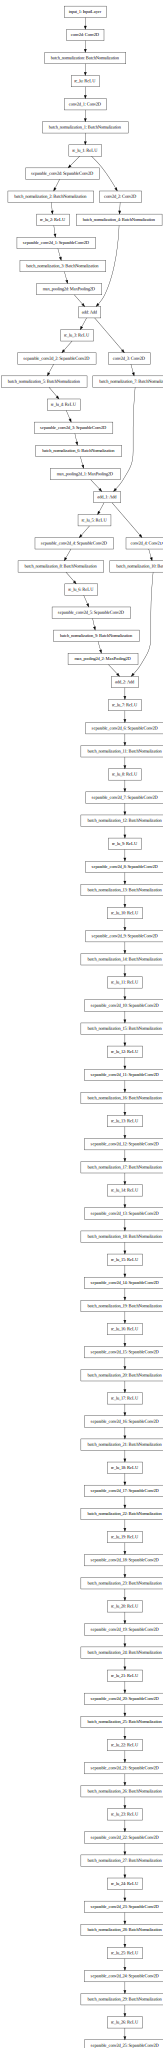

In [76]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Calculate inference time

In [ ]:
repetitions = 10
input = np.random.randn(1, *input_shape)

output = model.predict(input)
start = time()
for _ in range(repetitions):
  output = model.predict(input)
  
print((time() - start) / repetitions)